<a href="https://colab.research.google.com/github/nehana4sph/RIO-210-Build-a-Classification-Model-for-Drug-Trials-Dataset-Batch-01/blob/main/Drug_Classification_Using_Random_Forest_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
##loading dataset
drug_data = pd.read_csv('/content/drug200.csv')
drug_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
##Data preprocessing
drug_data.shape

(200, 6)

In [ ]:
drug_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
drug_data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
drug_data['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
drug_data['Sex'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
drug_data['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [ ]:
drug_data['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [ ]:
#rename the feature
drug_data.rename(columns = {'Sex':'Gender'}, inplace = True)

In [ ]:
drug_data.head()

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
drug_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
drug_data.columns

Index(['Age', 'Gender', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
##Label Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
drug_data['Gender'] = label_encoder.fit_transform(drug_data['Gender'])
drug_data['BP'] = label_encoder.fit_transform(drug_data['BP'])
drug_data['Drug'] = label_encoder.fit_transform(drug_data['Drug'])
drug_data['Cholesterol'] = label_encoder.fit_transform(drug_data['Cholesterol'])

In [ ]:
drug_data.head(15)

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
5,22,0,2,0,8.607,4
6,49,0,2,0,16.275,0
7,41,1,1,0,11.037,3
8,60,1,2,0,15.171,0
9,43,1,1,1,19.368,0


In [ ]:
drug_data['Drug'].unique()

array([0, 3, 4, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(drug_data[['Age', 'Gender', 'Drug']],
                                                    drug_data.Age, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((140, 3), (60, 3))

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled_ro = scaler.fit_transform(X_train) 
X_test_scaled_ro = scaler.transform(X_test)

In [ ]:
print('mean value of Age, Gender, Drug features: ', X_train_scaled_ro.mean(axis=0))
print('std value of Age, Gender, Drug features: ', X_test_scaled_ro.std(axis=0))

mean value of Age, Gender, Drug features:  [-0.06181319 -0.45        0.15      ]
std value of Age, Gender, Drug features:  [0.63505424 0.49749372 0.44556066]


(array([63.,  0.,  0.,  0.,  0.,  0.,  0., 77.]),
 array([-1.   , -0.875, -0.75 , -0.625, -0.5  , -0.375, -0.25 , -0.125,
         0.   ]),
 <BarContainer object of 8 artists>)

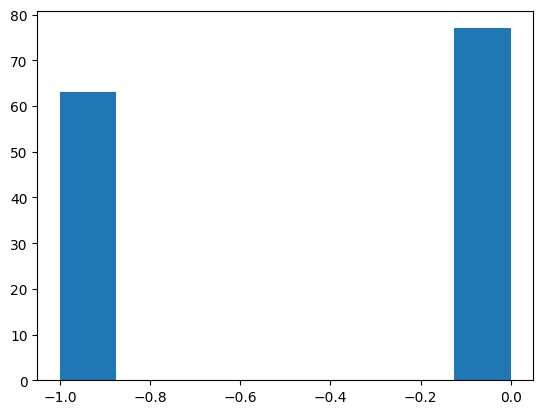

In [ ]:
# the distribution of the transformed variable Age

plt.hist(X_train_scaled_ro[:,1], bins=8)

(array([61.,  0.,  0.,  0.,  0., 18.,  0.,  0.,  0.,  0., 13.,  0.,  0.,
         0.,  0., 12.,  0.,  0.,  0., 36.]),
 array([-0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,
         0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,
         0.65,  0.7 ,  0.75]),
 <BarContainer object of 20 artists>)

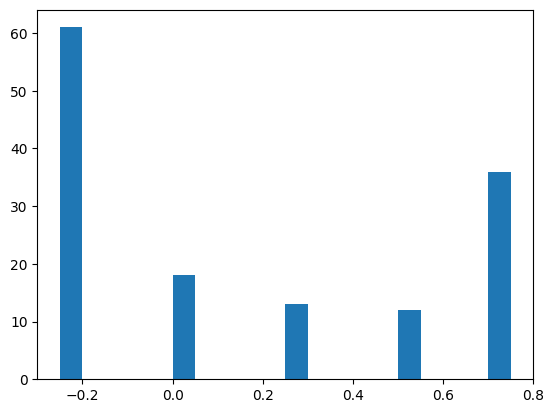

In [ ]:
# the distribution of the transformed variable Fare

plt.hist(X_train_scaled_ro[:,2], bins=20)

#EDA

Number of cells labeled Benign :  103
Number of cells labeled Malignant :  97

% of cells labeled Benign 51.5 %
% of cells labeled Malignant 48.5 %


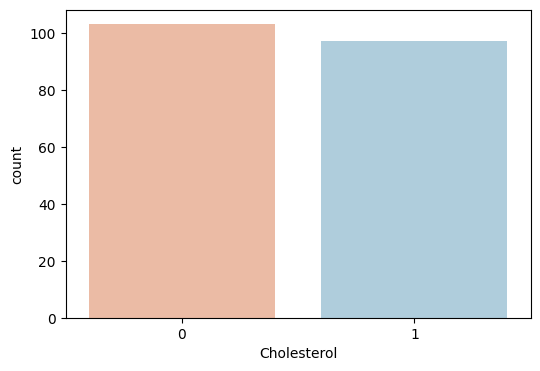

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x = drug_data['Cholesterol'], palette = 'RdBu')

benign, malignant = drug_data['Cholesterol'].value_counts()
print('Number of cells labeled Benign : ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(drug_data) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(drug_data) * 100, 2), '%')
plt.show()

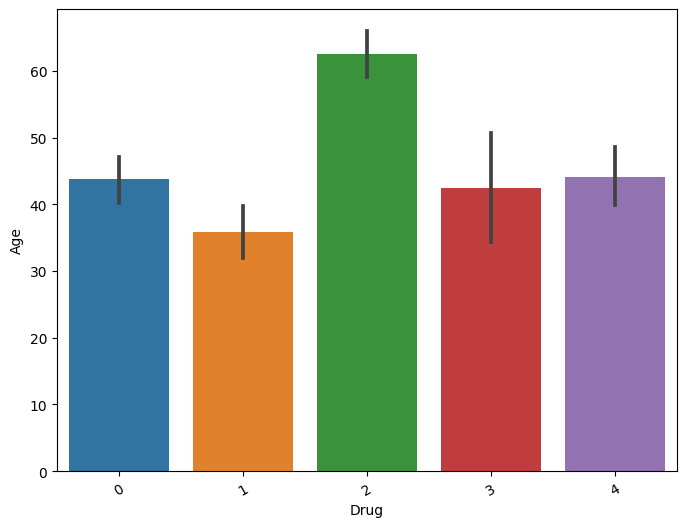

In [ ]:
plt.figure(figsize=(8,6))
g = sns.barplot(data = drug_data, x = 'Drug', y = 'Age')
plt.xticks(rotation = 30)
plt.show()

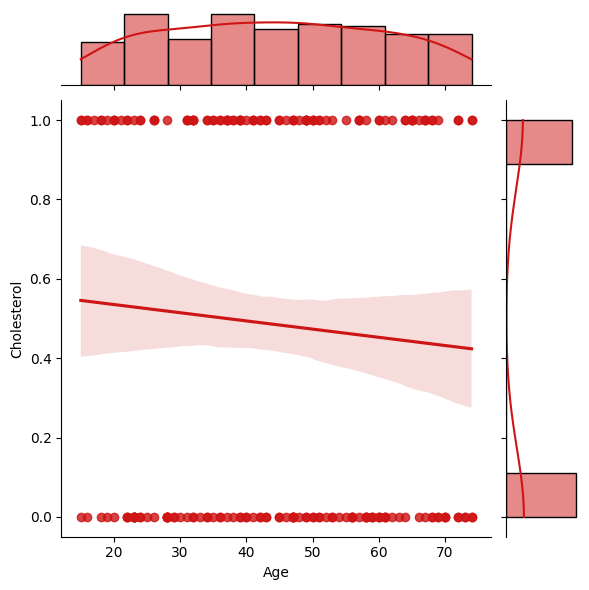

In [ ]:
sns.jointplot(x = drug_data.loc[:,'Age'], y = drug_data.loc[:,'Cholesterol'], kind="reg", color="#ce1414")
plt.show()

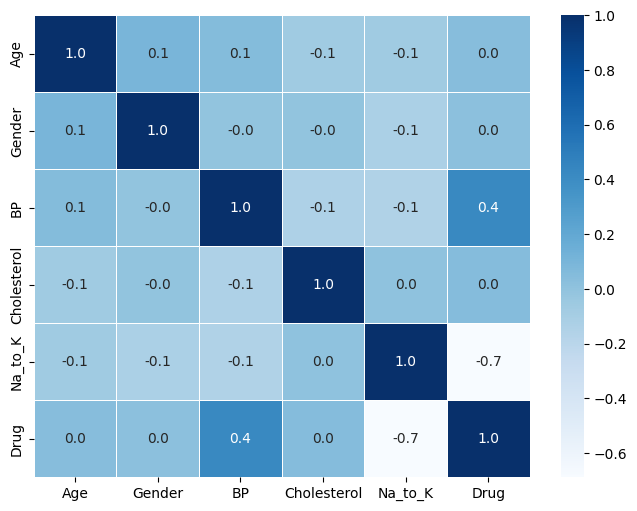

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(drug_data.corr(), annot = True, linewidths = .5, fmt = '.1f',ax = ax, cmap = 'Blues')
plt.show()

#Data Splitting

In [ ]:
drug_data.columns


Index(['Age', 'Gender', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
X = drug_data[['Age', 'Gender', 'BP', 'Cholesterol', 'Na_to_K']]
Y = drug_data['Drug'] 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (140, 5)
x_test:  (60, 5)
y_train:  (140,)
y_test:  (60,)


#Model Selection and Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
score = []
for i in range(1,51):
    clf = RandomForestClassifier(criterion = 'entropy', n_estimators = i)
    clf.fit(x_train,y_train)
    scores = clf.score(x_test,y_test)
    score.append(scores)

In [ ]:
score_rate = pd.DataFrame(data = score, columns = ['Score'])
score_rate.insert(loc=0, column = 'n_estimators', value=range(1,51))

In [ ]:
x = score_rate['n_estimators']
y = score_rate['Score']
fig = px.bar(x,y)
fig.show()

In [ ]:
model = RandomForestClassifier(criterion='entropy', n_estimators=30)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30)

In [ ]:
model.score(x_test,y_test)*100

98.33333333333333

In [ ]:
predict = model.predict(x_test)
predict

array([4, 3, 1, 0, 2, 4, 4, 4, 1, 0, 1, 4, 4, 0, 1, 0, 0, 2, 1, 0, 4, 0,
       4, 2, 4, 3, 0, 0, 4, 1, 4, 4, 4, 0, 1, 0, 1, 4, 0, 0, 1, 0, 0, 1,
       0, 2, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0])

#Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, predict))

Accuracy Score:  0.9833333333333333


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.90      1.00      0.95         9
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        15

    accuracy                           0.98        60
   macro avg       0.98      0.97      0.97        60
weighted avg       0.98      0.98      0.98        60



#Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, predict)
cm

array([[27,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0],
       [ 0,  1,  5,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 15]])

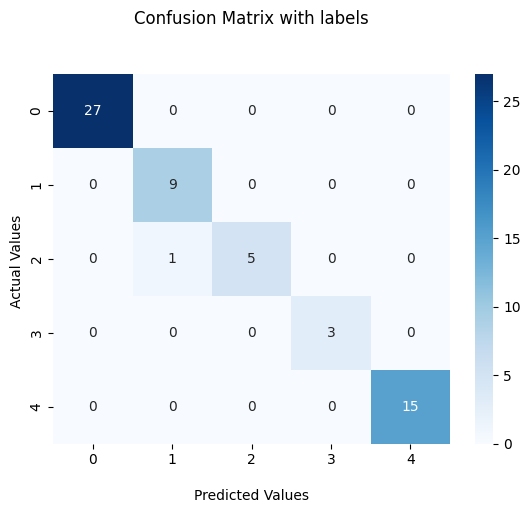

In [ ]:
# visualize confusion metrix

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

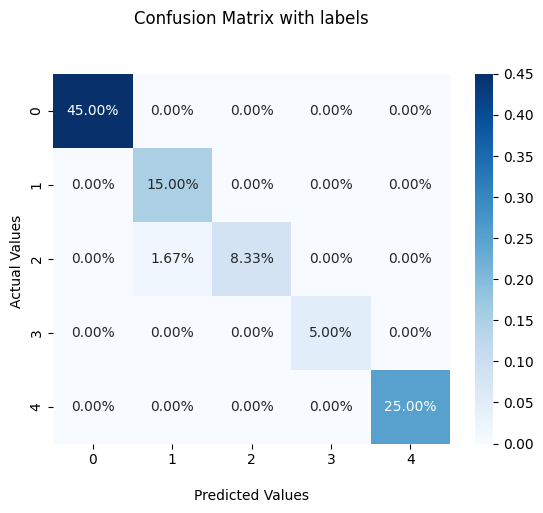

In [ ]:
ax = sns.heatmap(cm/np.sum(cm), annot=True,  fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

#Conclusion

In this Project Random Forest Classifier is a machine learning algorithm that has proven to be 
effective in drug classification And trained and evaluation of this model and find accuracy score is (0.98).